## Przykładowy model regresji logistycznej

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report,accuracy_score, confusion_matrix,  auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
import random
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
random.seed(2809)

In [3]:
df = pd.read_csv('./data/prenumerata.csv' , sep=';')

In [4]:
df.head()

,Prenumerata,Wiek,Dochody,Płeć,Ilość dzieci,Kredyt
0,0,25,132,0,1,2705.25
1,0,64,84,0,1,3807.50
2,0,31,100,1,0,4702.75
3,0,66,72,0,2,185.50
4,0,39,78,1,0,885.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 6 columns):
Prenumerata     407 non-null int64
Wiek            407 non-null int64
Dochody         407 non-null int64
Płeć            407 non-null int64
Ilość dzieci    407 non-null int64
Kredyt          407 non-null float64
dtypes: float64(1), int64(5)
memory usage: 19.2 KB


#### Analiza danych

Zmienną zależną jest kolumna Prenumerata informująca o zamówieniu (1) lub nie (0) prenumerty 

In [6]:
df.Prenumerata.value_counts(dropna = False)

0    236
1    171
Name: Prenumerata, dtype: int64

A procentowo?

In [7]:
df.Prenumerata.value_counts(dropna = False, normalize=True)

0    0.579853
1    0.420147
Name: Prenumerata, dtype: float64

Zbiór jest dośc zbilansowany, co w rzeczywostości rzadko się zdarza.

Zmienne zależne to pozostałe kolumny. Sprawdźmy czy wystepuję jakaś korelacja z zmienną zależną

In [8]:
df.corr().sort_values('Prenumerata')

,Prenumerata,Wiek,Dochody,Płeć,Ilość dzieci,Kredyt
Płeć,-0.001716,0.062418,-0.014905,1.000000,-0.021830,0.069830
Wiek,0.143982,1.000000,-0.040767,0.062418,-0.035319,0.117678
Ilość dzieci,0.218851,-0.035319,0.052005,-0.021830,1.000000,0.159462
Dochody,0.262871,-0.040767,1.000000,-0.014905,0.052005,0.164383
Kredyt,0.761596,0.117678,0.164383,0.069830,0.159462,1.000000
Prenumerata,1.000000,0.143982,0.262871,-0.001716,0.218851,0.761596


Statystyki zmiennych

In [9]:
df.describe()

,Prenumerata,Wiek,Dochody,Płeć,Ilość dzieci,Kredyt
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.420147,50.363636,107.756757,0.533170,0.798526,12414.974816
std,0.494190,15.016918,36.793557,0.499513,0.966787,14403.739149
min,0.000000,25.000000,50.000000,0.000000,0.000000,6.750000
25%,0.000000,37.500000,76.000000,0.000000,0.000000,2521.000000
50%,0.000000,51.000000,107.000000,1.000000,0.000000,5166.000000
75%,1.000000,64.000000,135.000000,1.000000,1.000000,21210.000000
max,1.000000,75.000000,200.000000,1.000000,4.000000,49948.000000


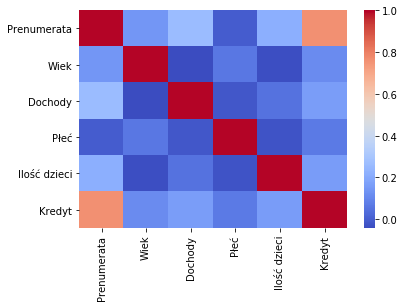

In [10]:
sns.heatmap(df.corr(),cmap="coolwarm");

#### Zbudujmy model oparty o regresje logistyczną

In [11]:
X=df.iloc[:,1:]
y=df['Prenumerata']

In [12]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [13]:
model = LogisticRegression(warm_start = True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.8699186991869918

In [15]:
confusion_matrix(y_test, y_pred)

array([[59,  4],
       [12, 48]], dtype=int64)

Poszukiwania najlepszych parametrów modelu

In [16]:
Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR_Grid = GridSearchCV(model, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

In [17]:
LR_Grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [18]:
print("\n------Training data---------------------------------------------------")
print("RECALL Training data:      ", np.round(recall_score(y_train, LR_Grid.predict(X_train)), decimals=3))
print("PRECISION Training data:   ", np.round(precision_score(y_train, LR_Grid.predict(X_train)), decimals=3))
print()
print("------Test data-------------------------------------------------------")

print("RECALL Test data is:        ", np.round(recall_score(y_test, LR_Grid.predict(X_test)), decimals=3))
print("PRECISION Test data is:     ", np.round(precision_score(y_test, LR_Grid.predict(X_test)), decimals=3))
print()
print("Confusion Matrix Test data :")
print(confusion_matrix(y_test, LR_Grid.predict(X_test)))
print("----------------------------------------------------------------------")
print(classification_report(y_test, LR_Grid.predict(X_test)))



------Training data---------------------------------------------------
RECALL Training data:       0.856
PRECISION Training data:    0.969

------Test data-------------------------------------------------------
RECALL Test data is:         0.8
PRECISION Test data is:      0.923

Confusion Matrix Test data :
[[59  4]
 [12 48]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        63
           1       0.92      0.80      0.86        60

    accuracy                           0.87       123
   macro avg       0.88      0.87      0.87       123
weighted avg       0.88      0.87      0.87       123



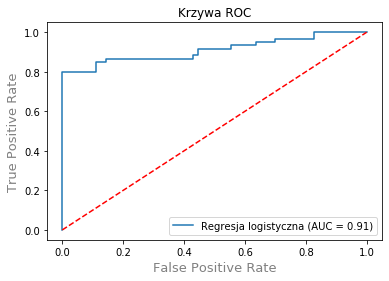

In [19]:
y_pred_proba = LR_Grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Regresja logistyczna (AUC = %0.2f)' % auc)

plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()